In [ ]:
import numpy as np #Library Numpy untuk multidimensional array dan fungsi matematika
import matplotlib.pyplot as plt #Library matplotlib untuk membuat plotting atau sumbu
from keras.layers import Input, Dense #Library Layers Keras dengan API untuk fungsi Input dan Dense
from keras.models import Model #Library Model Keras dengan API untuk membuat model
from keras.datasets import mnist #Library Datasets Keras dengan API untuk mengambil datasets MNIST

Using TensorFlow backend.


In [ ]:
#Load datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#Normalisasi data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
#Ukuran array data, yaitu 60000 jumlah gambar dari x_train dengan ukuran 28x28 pixel
x_train.shape

(60000, 28, 28)

In [ ]:
#Mengubah ukuran data dari 2 dimensi menjadi 1 dimensi / vektor
x_train = np.reshape(x_train,
                     (x_train.shape[0], 784))
x_test = np.reshape(x_test,
                     (x_test.shape[0], 784))

In [ ]:
#Hasil dari mengubah ukuran data
#Ukuran data menjadi 60000 jumlah gambar dengan jumlah vektor menjadi 784
x_train.shape

(60000, 784)

In [ ]:
#Pembuatan model autoencoder
#Input layer
inputs = Input(shape=(784,))
#Encoder layers
h_encode = Dense(512, activation='relu')(inputs)
h_encode = Dense(256, activation='relu')(h_encode)
h_encode = Dense(128, activation='relu')(h_encode)
h_encode = Dense(64, activation='relu')(h_encode)

# Coded
coded = Dense(32, activation='relu')(h_encode)

#Decoder layers
h_decode = Dense(64, activation='relu')(coded)
h_decode = Dense(128, activation='relu')(h_decode)
h_decode = Dense(256, activation='relu')(h_decode)
h_decode = Dense(512, activation='relu')(h_decode)
#Output layers
outputs = Dense(784, activation='sigmoid')(h_decode)
#Penggabungan input dan output layer
autoencoder = Model(inputs, outputs)

In [ ]:
#Konfigurasi model dengan menggunakan optimasi proses training dengan fungsi adam dan menghitung jumlah loss dengan loss funtion yaitu mean squared error
autoencoder.compile(optimizer='adam',
                    loss='mean_squared_error')
autoencoder.fit(x_train, x_train, #Melatih model dengan memberikan data latih yaitu x_train dengan tujuan x_train itu sendiri yang disebut self-supervised.
               epochs=10, #Proses perulangan 100 kali training
               batch_size=100,#Jumlah sample data yang dipelajari per total keseluruhan
               shuffle=True, #Mengacak data latih
               validation_data=(x_test, x_test)) #Validasi data sama seperti data latih

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 21s 344us/step - loss: 0.0100 - val_loss: 0.0099
Epoch 2/100
60000/60000 [==============================] - 20s 328us/step - loss: 0.0096 - val_loss: 0.0098
Epoch 3/100
60000/60000 [==============================] - 20s 329us/step - loss: 0.0093 - val_loss: 0.0095
Epoch 4/100
60000/60000 [==============================] - 20s 327us/step - loss: 0.0090 - val_loss: 0.0095
Epoch 5/100
60000/60000 [==============================] - 19s 323us/step - loss: 0.0088 - val_loss: 0.0093
Epoch 6/100
60000/60000 [==============================] - 20s 328us/step - loss: 0.0086 - val_loss: 0.0091
Epoch 7/100
60000/60000 [==============================] - 20s 328us/step - loss: 0.0084 - val_loss: 0.0090
Epoch 8/100
60000/60000 [==============================] - 20s 327us/step - loss: 0.0082 - val_loss: 0.0087
Epoch 9/100
60000/60000 [==============================] - 20s 331us/step - loss: 0.00

In [ ]:
#Menghasilkan sample output dari input
predicted = autoencoder.predict(x_test)

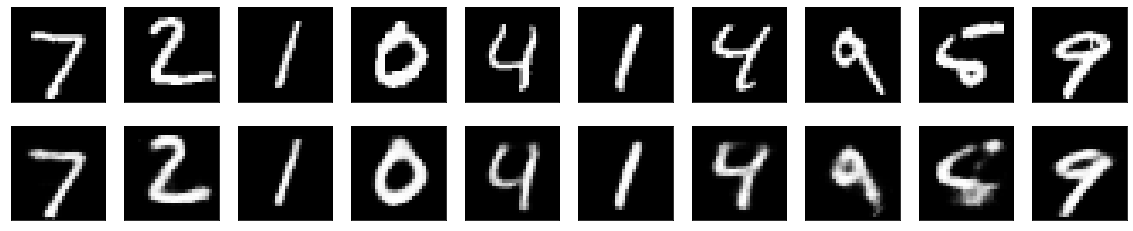

In [ ]:
n = 10 #Sample output berjumlah 10 secara random
plt.figure(figsize=(20,4)) #Jarak ukuran gambar

#Visualisasi gambar dari data test dan data predict
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show() #Menampilkan gambar